In [48]:
from tensorflow.keras.models import load_model
import tensorflow as tf


In [22]:
model = load_model("saved_model")

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

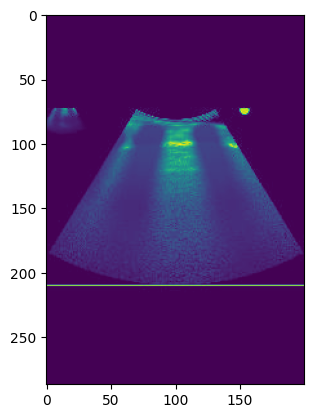

1/1 [==============================] - 0s 22ms/step


In [100]:
from IPython.display import display, HTML
import os, re
def process_image(path):
    img_san = cv2.imread(path)
    img_resized = cv2.resize(img_san, (200, 287))
    
    img_extended = np.expand_dims(img_resized, axis=0)
    return img_extended

img = process_image("intermediate/data/images/processed_frames/case_plaman-normal-modeA/screenshot_8_11_21.jpg")
img = plt.imread("intermediate/data/images/processed_frames/case_plaman-normal-modeA/screenshot_8_11_21.jpg")
plt.imshow(img)
plt.show()
def list_files(startpath):
    file_list = []
    for root, dirs, files in os.walk(startpath):
        for file in files:
            file_list.append(os.path.join(root, file))
    return file_list

# print(img.shape)
# prediction = model.predict(img)
# print(prediction)
html = "<div style='display: flex; flex-wrap: wrap;'>"
imagini = list_files("intermediate/data/images/processed_frames/")
for img_path in imagini:
    processed = process_image(img_path)
    prediction = model.predict(processed)
    
    border_color = ""
    pred_tag = ""
    if re.match(".*normal.*", img_path):

        if prediction < 0:
            pred_tag = "Colectie pleurala"
            border_color = "red"
        else:
            pred_tag = "Plaman normal"

            border_color = "green"
    if re.match(".*pleurala.*", img_path):

        if prediction > 0:
            pred_tag = "Plaman normal"

            border_color = "red"
        else:
            pred_tag = "Colectie pleurala"

            border_color = "green"
    html += f"<div style='margin: 5px; border: 5px solid {border_color};'>"
    html += f"<img src='{img_path}' style='width:200px; height:200px;'><br>{pred_tag}</div>"
    
html += "</div>"

with open('gallery.html', 'w') as f:
    f.write(html)